# Gradient Descent

## Basic Theory of Gradient Descent (Gradient is Derivative)

1. **Objective**: The primary goal of gradient descent is to find the minimum of a function. This function is often a loss function in machine learning, representing the difference between the predicted values and the actual values.

2. **Gradient**: The gradient of a function at a particular point is a vector pointing in the direction of the steepest ascent. In gradient descent, we're interested in the opposite direction—the steepest descent.

3. **Update Rule**: To find the minimum, gradient descent iteratively moves in the direction opposite to the gradient. At each step, the parameters are updated as follows:

$$θ_{ new } = θ_{ old } - α ∇F(θ_{ old })$$

Here, `θ` represents the parameters, `α` is the learning rate (a small, positive number), and `∇F(θ)` is the gradient of the function `F` with respect to `θ`.

4. **Learning Rate**: The learning rate `α` determines the size of the steps taken towards the minimum. If `α` is too large, the algorithm might overshoot the minimum; if it's too small, the convergence might be very slow.

5. **Convergence**: The process continues until the algorithm converges, meaning the change in the function value between iterations is below a predetermined threshold, or a maximum number of iterations is reached.

## Convergence
Convergence itself is a very interesting concept


## Example of Gradient Descent

Suppose we have a simple quadratic function: `F(x) = x^2`.

1. **Initialization**: Choose an initial value, say `x_0 = 5`.

2. **Compute the Gradient**: The gradient of `F` at `x` is `∇F(x) = 2x`. At `x_0 = 5`, the gradient is `2 × 5 = 10`.

3. **Update Rule Application**: Choose a learning rate, say `α = 0.1`. Update `x` as follows:
$$x_{ new } = x_{ old } - α ∇F(x_{ old })$$
$$x_{ new } = 5 - 0.1 × 10 = 4$$

4. **Iterate**: Repeat the process with the new value of `x`.

This process will continue until the value of `x` settles at or near the minimum of the function, which in this case is `x = 0`. Each iteration moves closer to the minimum, and the size of each step is governed by the learning rate and the steepness of the function's slope at the current point.


In [1]:
def gradient_descent(learning_rate, num_iterations):
    x = 5  # Starting point
    for i in range(num_iterations):
        gradient = 2 * x  # Derivative of F(x) = x^2
        x = x - learning_rate * gradient
        print(f"Iteration {i+1}: x = {x}, F(x) = {x**2}")


# Example usage
learning_rate = 0.1
num_iterations = 10
gradient_descent(learning_rate, num_iterations)

Iteration 1: x = 4.0, F(x) = 16.0
Iteration 2: x = 3.2, F(x) = 10.240000000000002
Iteration 3: x = 2.56, F(x) = 6.5536
Iteration 4: x = 2.048, F(x) = 4.194304
Iteration 5: x = 1.6384, F(x) = 2.68435456
Iteration 6: x = 1.31072, F(x) = 1.7179869184000003
Iteration 7: x = 1.0485760000000002, F(x) = 1.0995116277760004
Iteration 8: x = 0.8388608000000002, F(x) = 0.7036874417766403
Iteration 9: x = 0.6710886400000001, F(x) = 0.45035996273704976
Iteration 10: x = 0.5368709120000001, F(x) = 0.2882303761517119


In [3]:
def gradient_descent(starting_point, learning_rate, n):
    x = starting_point
    x_values = []
    f_x_values = []
    for i in range(n):
        # Derivate of F(x) = x^2 is df(x) = 2x
        gradient = 2 * x
        # Learning rate (x here is Theta in the above equation)
        x = x - learning_rate * gradient
        x_values.append(x)
        f_x_values.append(x**2)

    return x_values, f_x_values


# Run Gradient descent
starting_point = 10
learning_rate = 0.1
num_iterations = 20

x_values, f_x_values = gradient_descent(
    starting_point, learning_rate, num_iterations
)

In [4]:
import plotly.graph_objects as go

# Create the plot using Plotly
fig = go.Figure()

# Add trace for the gradient descent iterations
fig.add_trace(
    go.Scatter(
        x=list(range(1, num_iterations + 1)),
        y=f_x_values,
        mode="lines+markers",
        name="F(x) per Iteration",
    )
)

# Update plot layout
fig.update_layout(
    title="Gradient Descent Progression",
    xaxis_title="Iteration",
    yaxis_title="F(x) = x^2",
    template="plotly_dark",
)

$$ \phi_{macro} = a_i * {DTF} ^ {b_i} $$

  với ${a_i}, {b_i}$ là hệ số tương ứng $a,b$ của từng loại Rock

$$ \phi_{macro} = 10^{-2} * \frac{DTF}{DTF_{max}} * \phi_{max} $$

# Stochastic Gradient Descent

`Stochastic Gradient Descent (SGD)` is a variation of the gradient descent algorithm that updates the parameters using only a single or a few training examples at each iteration. This can be particularly useful when dealing with large datasets.

Let's consider the following equation
$$ f(x,y) = x^2 + y^2 $$

so the derivate should be:
<!-- $$\nabla fx(x,y) = 2x $$
$$\nabla fy(x,y) = 2y $$ -->

$$\frac{\partial f(x,y)}{\partial x} = 2x $$
$$\frac{\partial f(x,y)}{\partial y} = 2y $$

In [6]:
import numpy as np
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# function f(x,y)
def f(x, y):
    return x**2 + y**2


# Partial derivatives
def df_dx(x):
    return 2 * x


def df_dy(y):
    return 2 * y


# SGD
def SGD(starting_point, learning_rate, n_iterate):
    x_values = [starting_point[0]]
    y_values = [starting_point[1]]
    f_values = [f(starting_point[0], starting_point[1])]

    x, y = starting_point

    for i in range(num_iterations):
        # Randomly choosing which variable to update
        if np.random.rand() < 0.5:
            x = x - learning_rate * df_dx(x)
        else:
            y = y - learning_rate * df_dy(y)

    x_values.append(x)
    y_values.append(y)
    f_values.append(f(x, y))

    return x_values, y_values, f_values


# Parameters
starting_point = [10, 10]  # Starting point of descent (x, y)
learning_rate = 0.1  # Learning rate
num_iterations = 20  # Number of iterations

# Perform Stochastic Gradient Descent
x_values, y_values, f_values = SGD(
    starting_point, learning_rate, num_iterations
)

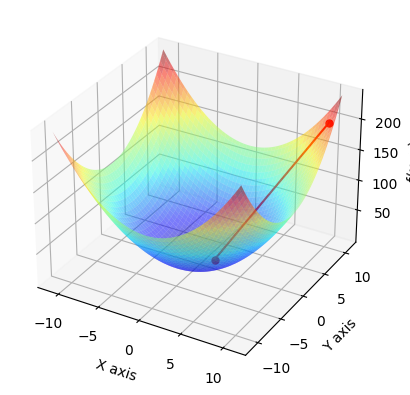

In [7]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Create a grid for plotting
x_grid, y_grid = np.meshgrid(
    np.linspace(-11, 11, 100), np.linspace(-11, 11, 100)
)
f_grid = f(x_grid, y_grid)

# Plot the function surface
ax.plot_surface(x_grid, y_grid, f_grid, alpha=0.5, cmap="jet")

# Plot the SGD steps
ax.plot(x_values, y_values, f_values, color="r", marker="o", markersize=5)

# Set labels
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("f(x, y)")

# Show plot
plt.show()

# Newton method